# **IMPORT LIBRARIES** 

In [19]:
import numpy as np 
import pandas as pd 

# **IMPORT DATASET**

In [20]:
df=pd.read_csv("data2/diamonds.csv")

In [21]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


 # **DATA CLEANNING**

**CONVERT THE STRING VALUE INTO NUMERICAL VALUE**

In [22]:
df["cut"]=df["cut"].astype("category")
df["cut"]=df["cut"].cat.codes
df["color"]=df["color"].astype("category")
df["color"]=df["color"].cat.codes
df["clarity"]=df["clarity"].astype("category")
df["clarity"]=df["clarity"].cat.codes

In [23]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,2757


In [24]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int8   
 2   color    53940 non-null  int8   
 3   clarity  53940 non-null  int8   
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), int8(3)
memory usage: 3.0 MB
None


In [25]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [26]:
df.duplicated().sum()

146

In [27]:
df = df.drop_duplicates()

In [28]:
df.dtypes

carat      float64
cut           int8
color         int8
clarity       int8
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

# **DEFINE X AND Y**

In [29]:
x=df.drop(columns='price')
x

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [30]:
y=df["price"]

# **SPLIT THE DATASET IN TRAINING SET AND TEST SET**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# **TRAIN THE MODEL ON THE TRAINING SET**

In [33]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [34]:
c=lr.intercept_

In [35]:
c

17296.56149578893

In [36]:
m=lr.coef_
m

array([11271.84136162,    71.23001103,  -267.13294668,   288.46339088,
        -164.00394101,   -98.11665441, -1300.25539137,    24.79541444,
          35.54080036])

# **PREDICT THE TEST SET RESULTS**

In [37]:
y_pred_train=lr.predict(x_train)
y_pred_train

array([-662.02695822, 2762.90710602, 8295.49808268, ..., 1362.63340837,
       2468.44301654, 2789.37229905])

# **PLOT THE RESULTS**

In [38]:
import matplotlib.pyplot as plt


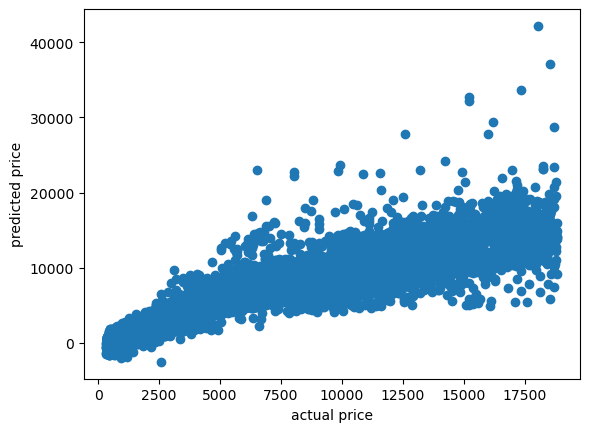

In [39]:
plt.scatter(y_train,y_pred_train)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.show()

# **EVALUATE THE MODEL**

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_train,y_pred_train)

0.8871897234999403

# 

In [42]:
y_pred_test=lr.predict(x_test)


In [43]:
r2_score(y_test,y_pred_test )

0.8805480325290554

# **PREDICTED VALUES**

In [44]:
pred_y_df=pd.DataFrame({"Actual value": y_test,"predicted value":y_pred_test, "Difference": y_test-y_pred_test})
pred_y_df[0:20]

,Actual value,predicted value,Difference
28297,432,-260.004564,692.004564
17356,6964,5671.239481,1292.760519
48882,2037,2362.862183,-325.862183
19901,8451,7020.744892,1430.255108
44377,1581,1462.433679,118.566321
44577,1607,2260.191599,-653.191599
38425,1026,1272.011827,-246.011827
38617,489,-1548.101130,2037.101130
21531,9630,7762.929620,1867.070380
42545,1324,1030.719467,293.280533
